Задача 5.3. В условиях задачи 4.2 построить фильтр Калмана и сравнить его результаты с результатами аппроксимации оптимальной оценки фильтрации.

Условие задачи 4.2: Для линейной гауссовской системы наблюдения (скалярное состояние, скаляр-ное наблюдение)

𝑋𝑡= 𝑎𝑡𝑋𝑡−1+с𝑡+ 𝑏𝑡𝑉𝑡,𝑡 ∈ ℕ, 𝑋0 ~ 𝒩(𝑚0,𝐷0), 𝑌𝑡= 𝐴𝑡𝑋𝑡+С𝑡+ 𝐵𝑡𝑊𝑡,

численно реализовать алгоритм оптимальной фильтрации (4.13) - (4.18). Использовать се-точный метод. Положение и масштаб сетки выбирать и контролировать с помощью метода моментов. На отрезке времени [0,100] на общем рисунке построить графики точного состо-яния 𝑋𝑡, наблюдения 𝑌𝑡 и оптимальной оценки 𝑋̂𝑡 для набора параметров (𝑎𝑡,𝑏𝑡,𝑐𝑡,𝐴𝑡,𝐵𝑡,𝐶𝑡)=(1,0.5,0,1,1,0). На отрезке времени [0,100] на общем рисунке по-строить графики точного состояния 𝑋𝑡, наблюдения 𝑌𝑡 и оптимальной оценки 𝑋̂𝑡 для набора параметров (𝑎𝑡,𝑏𝑡,𝑐𝑡,𝐴𝑡,𝐵𝑡,𝐶𝑡)=(−0.5,0.5,1,1,1,0).

Теорема 5.4. (Фильтр Калмана). Оптимальная оценка 𝑋̂𝑡 состояния системы (5.1) и ковари-ационная матрица ее ошибки 𝑘𝑡=𝑐𝑜𝑣(𝑋̂𝑡− 𝑋𝑡,𝑋̂𝑡− 𝑋𝑡) вычисляются с помощью следу-ющего двухшагового рекуррентного алгоритма:

1. Шаг прогноза:

𝑋̃𝑡= 𝐸[𝑋𝑡 |𝒴𝑡−1]= 𝑎𝑡𝑋̂𝑡−1+ 𝑐𝑡, (5.9) 𝑘̃𝑡= 𝑐𝑜𝑣(𝑋̃𝑡− 𝑋𝑡,𝑋̃𝑡− 𝑋𝑡)=𝑎𝑡𝑘𝑡−1𝑎𝑡𝑇+ 𝑏𝑡𝑏𝑡𝑇, (5.10)

2. Шаг коррекции:

𝑋̂𝑡= 𝑋̃𝑡+ 𝑘̃𝑡𝐴𝑡𝑇 (𝐴𝑡𝑘̃𝑡𝐴𝑡𝑇+ 𝐵𝑡𝐵𝑡𝑇)+(𝑌𝑡− 𝐴𝑡𝑋̃𝑡−𝐶𝑡), (5.11) 𝑘𝑡= 𝑘̃𝑡− 𝑘̃𝑡𝐴𝑡𝑇 (𝐴𝑡𝑘̃𝑡𝐴𝑡𝑇+ 𝐵𝑡𝐵𝑡𝑇)+ 𝐴𝑡𝑘̃𝑡. (5.12)

3. Начальное условие

𝑋̂0= 𝑚0+𝐷0𝐴0𝑇(𝐴0𝐷0𝐴0𝑇+𝐵0𝐵0𝑇)^(+)*(𝑌0− 𝐴0𝑚0− 𝐶0), (5.13) 𝑘0= 𝐷0− 𝐷0𝐴0𝑇(𝐴0𝐷0𝐴0𝑇+𝐵0𝐵0𝑇)+𝐴0𝐷0. (5.14)

In [ ]:
import numpy as np

In [ ]:
a, b, c, A, B, C, m0, D0 = (1, 0.5, 0, 1, 1, 0, 0, 1)
t_start, t_end = (0, 100)

In [ ]:
a_t = [a for i in range(t_end + 1)]
b_t = [a for i in range(t_end + 1)]
c_t = [c for i in range(t_end + 1)]
A_t = [A for i in range(t_end + 1)]
B_t = [B for i in range(t_end + 1)]
C_t = [C for i in range(t_end + 1)]

In [ ]:
A_0, B_0, C_0, V_0, W_0 = (1, 1, 0, np.random.normal(loc=0.0, scale=1.0), np.random.normal(loc=0.0, scale=1.0))

In [ ]:
X_0 = np.random.normal(loc=m0, scale=D0)
Y_0 = A_0 * X_0 + C_0 + B_0 * W_0

In [ ]:
print(X_0, Y_0)

0.6917275807006845 0.9944763758843631


𝑋𝑡= 𝑎𝑡𝑋𝑡−1+с𝑡+ 𝑏𝑡𝑉𝑡,𝑡 ∈ ℕ, 𝑋0 ~ 𝒩(𝑚0,𝐷0), 𝑌𝑡= 𝐴𝑡𝑋𝑡+С𝑡+ 𝐵𝑡𝑊𝑡,

In [ ]:
def create_real(a_t, b_t, c_t, A_t, B_t, C_t, X_0, Y_0, t_end):
  X, Y = [X_0], [Y_0]
  W = np.random.normal(loc=0.0, scale=1.0, size = t_end + 1)
  V = np.random.normal(loc=0.0, scale=1.0, size = t_end + 1)
  for i in range(1, t_end + 1):
    X.append(a_t[i] * X[i - 1] + c_t[i] + b_t[i] * V[i])
    Y.append(A_t[i] * X[i] + C_t[i] + B_t[i] * W[i])
  return X, Y

In [ ]:
X, Y = create_real(a_t, b_t, c_t, A_t, B_t, C_t, X_0, Y_0, t_end)

𝑋̂0= 𝑚0+𝐷0𝐴0𝑇(𝐴0𝐷0𝐴0𝑇+𝐵0𝐵0𝑇)^(+)*(𝑌0− 𝐴0𝑚0− 𝐶0), (5.13) 𝑘0= 𝐷0− 𝐷0𝐴0𝑇(𝐴0𝐷0𝐴0𝑇+𝐵0𝐵0𝑇)^(+)𝐴0𝐷0. (5.14)

In [ ]:
def start_pred(A_t, B_t, C_t, m0, D0, Y_0):
  X_pred_0 = m0 + ((D0 * A_t[0]) / (A_t[0] * D0 * A_t[0] + B_t[0] * B_t[0])) * (Y_0 - A_t[0] * m0 - C_t[0])
  Y_pred_0 = Y_0
  k_pred_0 = D0 - ((D0 * A_t[0]) / (A_t[0] * D0 * A_t[0] + B_t[0] * B_t[0])) * A_t[0] * D0
  return X_pred_0, Y_pred_0, k_pred_0

In [ ]:
X_pred_0, Y_pred_0, k_pred_0 = start_pred(A_t, B_t, C_t, m0, D0, Y_0)

𝑋̃𝑡= 𝐸[𝑋𝑡 |𝒴𝑡−1]= 𝑎𝑡𝑋̂𝑡−1+ 𝑐𝑡, (5.9) 𝑘̃𝑡= 𝑐𝑜𝑣(𝑋̃𝑡− 𝑋𝑡,𝑋̃𝑡− 𝑋𝑡)=𝑎𝑡𝑘𝑡−1𝑎𝑡𝑇+ 𝑏𝑡𝑏𝑡𝑇, (5.10)


𝑋̂𝑡= 𝑋̃𝑡+ 𝑘̃𝑡𝐴𝑡𝑇 (𝐴𝑡𝑘̃𝑡𝐴𝑡𝑇+ 𝐵𝑡𝐵𝑡𝑇)+(𝑌𝑡− 𝐴𝑡𝑋̃𝑡−𝐶𝑡), (5.11) 𝑘𝑡= 𝑘̃𝑡− 𝑘̃𝑡𝐴𝑡𝑇 (𝐴𝑡𝑘̃𝑡𝐴𝑡𝑇+ 𝐵𝑡𝐵𝑡𝑇)+ 𝐴𝑡𝑘̃𝑡. (5.12)

In [ ]:
def forec(X_pred_t, k_pred_t, i):
  X_for = a_t[i] * X_pred_t[i - 1] + c_t[i]
  k_for = a_t[i] * k_pred_t[i - 1] * a_t[i] + b_t[i] * b_t[i]
  return X_for, k_for

def correc(X_for, k_for, Y, i):
  temp = A_t[i] * k_for * A_t[i] + B_t[i] * B_t[i]
  if temp != 0:
    temp = 1 / temp
  X_cor = X_for + k_for * A_t[i] * temp * (Y[i] - A_t[i] * X_for - C_t[i])
  k_cor = k_for - k_for * A_t[i] * temp * A_t[i] * k_for
  return X_cor, k_cor 

In [ ]:
from tqdm import tqdm

In [ ]:
X_pred_t = [X_pred_0]
k_pred_t = [k_pred_0]
for i in tqdm(range(1, t_end + 1)):
  X_for, k_for = forec(X_pred_t, k_pred_t, i)
  X_cor, k_cor = correc(X_for, k_for, Y, i)
  X_pred_t.append(X_cor)
  k_pred_t.append(k_cor)

100%|██████████| 100/100 [00:00<00:00, 32927.49it/s]


In [ ]:
import matplotlib.pylab as plt

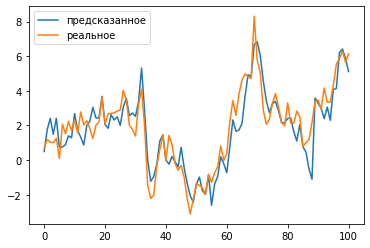

In [ ]:
plt.plot(np.arange(t_end + 1), X_pred_t, label = "предсказанное")
plt.plot(np.arange(t_end + 1), X, label = "реальное")
plt.legend()

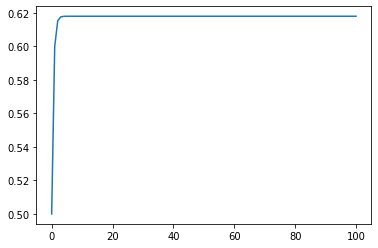

In [ ]:
plt.plot(np.arange(t_end + 1), k_pred_t)

Сделаем для других параметров

In [ ]:
a, b, c, A, B, C, m0, D0 = (-0.5, 0.5, 1, 1, 1, 0, 0, 1)
t_start, t_end = (0, 100)

In [ ]:
a_t = [a for i in range(t_end + 1)]
b_t = [a for i in range(t_end + 1)]
c_t = [c for i in range(t_end + 1)]
A_t = [A for i in range(t_end + 1)]
B_t = [B for i in range(t_end + 1)]
C_t = [C for i in range(t_end + 1)]

In [ ]:
A_0, B_0, C_0, V_0, W_0 = (1, 1, 0, np.random.normal(loc=0.0, scale=1.0), np.random.normal(loc=0.0, scale=1.0))

In [ ]:
X_0 = np.random.normal(loc=m0, scale=D0)
Y_0 = A_0 * X_0 + C_0 + B_0 * W_0

In [ ]:
X, Y = create_real(a_t, b_t, c_t, A_t, B_t, C_t, X_0, Y_0, t_end)

In [ ]:
X_pred_0, Y_pred_0, k_pred_0 = start_pred(A_t, B_t, C_t, m0, D0, Y_0)

In [ ]:
X_pred_t = [X_pred_0]
k_pred_t = [k_pred_0]
for i in tqdm(range(1, t_end + 1)):
  X_for, k_for = forec(X_pred_t, k_pred_t, i)
  X_cor, k_cor = correc(X_for, k_for, Y, i)
  X_pred_t.append(X_cor)
  k_pred_t.append(k_cor)

100%|██████████| 100/100 [00:00<00:00, 164418.03it/s]


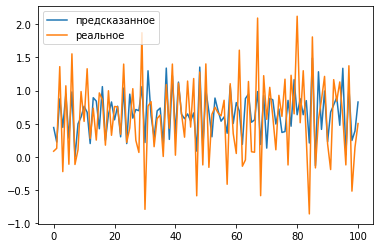

In [ ]:
plt.plot(np.arange(t_end + 1), X_pred_t, label = "предсказанное")
plt.plot(np.arange(t_end + 1), X, label = "реальное")
plt.legend()

Задача 5.2. «На инженерном уровне точности», используя аппроксимацию Эйлера-Мару-ямы, вывести уравнения фильтра Калмана-Бьюси.

Определение 3.8. Схема

𝑌𝑚𝑛= 𝑌𝑚−1𝑛+ 𝑎(𝑌𝑚−1𝑛,𝜏𝑚−1𝑛)ℎ+ 𝑎(𝑌𝑚−1𝑛,𝜏𝑚−1𝑛) (𝑤(𝜏𝑚𝑛)−𝑤(𝜏𝑚−1𝑛)), 𝑌𝑚𝑛=𝑋0 (3.27)

называется схемой Эйлера (Эйлера-Маруямы).

Для фильтра Калмана-Бьюси

𝑑𝑋𝑡= (𝑎𝑡𝑋𝑡+ с𝑡)𝑑𝑡+ 𝑏𝑡𝑑𝑤𝑡,𝑡>0, 𝑋0 ~ 𝒩(𝑚0,𝐷0), (5.17),

𝑑𝑌𝑡= (𝐴𝑡𝑋𝑡+𝐶𝑡)𝑑𝑡+ 𝐵𝑡𝑑𝑊𝑡, 𝑡>0, 𝑌0=0 (5.18).

In [ ]:
a, b, c, A, B, C, m0, D0 = (1, 1, 1, 1, 1, 0, 0, 1)
h = 1e-4
T = 1
grid = np.arange(0, T + h, h)
last = grid.shape[0]

In [ ]:
X_0 = np.random.normal(loc=m0, scale=D0)
Y_0 = 0

Сделаем X, Y по (5.17) и (5.18)

In [ ]:
def create_X_Y(a, b, c, A, B, C, h, X_0, Y_0, last):
  X, Y = [X_0], [Y_0]
  for i in range(1, last):
    X.append((X[i - 1] + c * h + b * np.random.normal(loc=0.0, scale=np.sqrt(h))) / (1 - a * h))
    Y.append(A * X[i] + C + B * np.random.normal(loc=0.0, scale=np.sqrt(h)))
  return X, Y

In [ ]:
X, Y = create_X_Y(a, b, c, A, B, C, h, X_0, Y_0, last)

𝑑𝑋̅𝑡= (𝑎𝑡𝑋̅𝑡+ 𝑐𝑡)𝑑𝑡+ 𝑘𝑡𝐴𝑡𝑇 (𝐵𝑡𝐵𝑡𝑇)−1(𝑑𝑌𝑡− (𝐴𝑡𝑋̅𝑡−𝐶𝑡)𝑑𝑡), (5.19) 

𝑘̇𝑡= 𝑎𝑡𝑘𝑡𝑎𝑡𝑇+ 𝑏𝑡𝑏𝑡𝑇− 𝑘𝑡𝐴𝑡𝑇 (𝐵𝑡𝐵𝑡𝑇)−1 𝑘𝑡𝐴𝑡 (5.20)

Используя 5.19 и 5.20 выведем k_t, а затем a_func, b_func для метода Эйлера-Маруямы

k_t' = k_t + 1 - k_t^2, k_0 = D0

Решение: (-3 + sqrt(5) + (3 + sqrt(5)) e^(sqrt(5) t))/(-1 + sqrt(5) + (1 + sqrt(5)) e^(sqrt(5) t))

In [ ]:
def k_t_func(i):
  return (-3 + np.sqrt(5) + (3 + np.sqrt(5)) * np.e**(np.sqrt(5) * i)) / ( -1 + np.sqrt(5) + (1 + np.sqrt(5)) * np.e**(np.sqrt(5) * i))

def a_func(a, b, c, A, B, C, y, i):
  temp = k_t_func(i) * A / (B ** 2)
  return (a - temp * A) * y + c + temp * C

def b_func(A, B, i):
  return k_t_func(i) * A / (B ** 2)

def dY(i):
  return Y[i] - Y[i - 1]

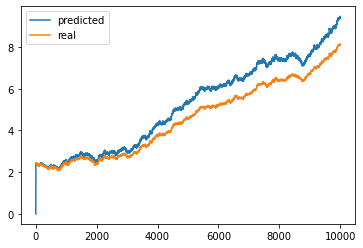

In [ ]:
my_y = np.zeros(last)
my_y[0] = m0

for i in range(1, last):
    t_cur = grid[i - 1]
    y_last = my_y[i - 1]
    my_y[i] = y_last + a_func(a, b, c, A, B, C, y_last, t_cur) * h + b_func(A, B, t_cur) * dY(i)
plt.plot(np.arange(grid.shape[0]), my_y, label='predicted')
plt.plot(np.arange(grid.shape[0]), X, label='real')
plt.legend()